<a href="https://colab.research.google.com/github/Jungddaseul/Big-Data-Certification-study-/blob/main/T1_4_%EC%99%9C%EB%8F%84%EC%99%80_%EC%B2%A8%EB%8F%84_%EA%B5%AC%ED%95%98%EA%B8%B0_(%EB%A1%9C%EA%B7%B8%EC%8A%A4%EC%BC%80%EC%9D%BC)_Expected_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 왜도와 첨도 구하기
-  주어진 데이터 중 train.csv에서 'SalePrice'컬럼의 왜도와 첨도를 구한 값과, 'SalePrice'컬럼을 스케일링(log1p)로 변환한 이후 왜도와 첨도를 구해 모두 더한 다음 소수점 2째자리까지 출력하시오
- 데이터셋 : House Prices - Advanced Regression Technique (https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

### 왜도
비대칭도(非對稱度, skewness) 또는 왜도(歪度)는 **실수 값 확률 변수의 확률 분포 비대칭성을 나타내는 지표**이다. 왜도의 값은 양수나 음수가 될 수 있으며 정의되지 않을 수도 있다. 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포해 있다. 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포해 있다는 것을 나타낸다. 평균과 중앙값이 같으면 왜도는 0이 된다.

**위키백과 https://ko.wikipedia.org/wiki/%EB%B9%84%EB%8C%80%EC%B9%AD%EB%8F%84

### 첨도
**확률분포의 꼬리가 두꺼운 정도**를 나타내는 척도이다. 극단적인 편차 또는 이상치가 많을 수록 큰 값을 나타낸다. 첨도값(K)이 3에 가까우면 산포도가 정규분포에 가깝다. 3보다 작을 경우에는(K<3) 산포는 정규분포보다 꼬리가 얇은 분포로 생각할 수 있다, 첨도값이 3보다 큰 양수이면(K>3) 정규분포보다 꼬리가 두꺼운 분포로 판단할 수 있다.

In [6]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/빅분기/house-prices-advanced-regression-techniques/train.csv')
df['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
# 왜도(skew), 첨도(kurtosis)
s1 = df['SalePrice'].skew()
k1 = df['SalePrice'].kurtosis()
print('왜도 : ', s1)
print('첨도 : ', k1)

왜도 :  1.8828757597682129
첨도 :  6.536281860064529


- 기본적으로 math와 넘파이 패키지에서 제공하는 로그 표현 
- 메소드의 종류는 밑이 2인 로그를 나타내는 log2
- 밑이 10인 상용로그를 나타내는 log10
- 자연로그를 표현할 수 있는 log
- log(1+n) 형태를 의미하는 log1p

In [12]:
# SalePrice 컬럼 스케일링(log1p)로 변환
df['SalePrice'] = np.log1p(df['SalePrice'])

In [14]:
s2 = df['SalePrice'].skew()
k2 = df['SalePrice'].kurtosis()
print('log변환 후 왜도 : ', s2)
print('log 변환 후 첨도 : ', k2)

log변환 후 왜도 :  0.12134661989685333
log 변환 후 첨도 :  0.809519155707878


In [16]:
# 왜도와 첨도를 구해 모두 더한 다음 소수점 2째자리까지 출력하시오
print(round(s1 + s2 + k1 + k2, 2))

9.35


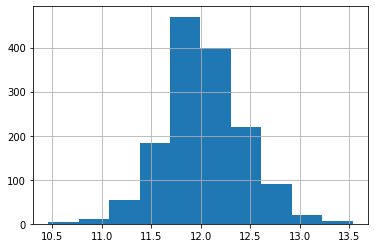

In [17]:
df['SalePrice'].hist()